In [1]:
import seaborn  as sns
import numpy as np

data = np.load('points.npy')
print(data.shape)


(50982, 3)


In [3]:
data

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [4]:
import os 
import cv2

vid_path = '/home/mahesh/visual_odometry/WhatsApp Video 2025-04-08 at 11.25.26.mp4'
output_path = 'test-1/varun_farm'

os.makedirs(output_path, exist_ok=True)
cap = cv2.VideoCapture(vid_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret: break
    frames.append(frame)

len(frames)

358

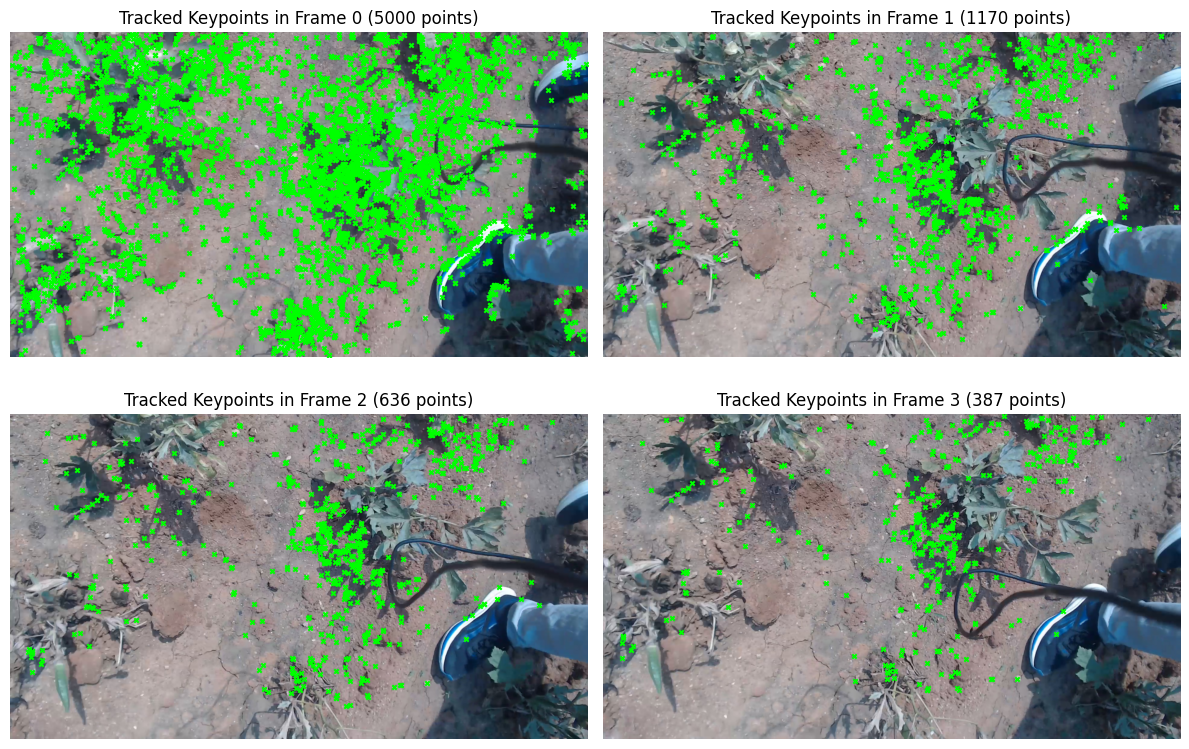

In [12]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to image directory
path = '/home/mahesh/visual_odometry/test-1/forth'

# Get first 4 .jpg images
image_files = sorted([f for f in os.listdir(path)])[40:44]
images = [cv2.imread(os.path.join(path, f)) for f in image_files]

# SIFT detector
sift = cv2.SIFT_create(5000)

# FLANN matcher parameters
index_params = dict(algorithm=1, trees=5)  # KDTree
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Detect keypoints in the first image
gray0 = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
kp0, des0 = sift.detectAndCompute(gray0, None)

# Store the coordinates of the tracked keypoints for visualization
tracked_points = [kp0]  # First frame

# Now track keypoints from image 0 through 1, 2, and 3
prev_kp = kp0
prev_des = des0

for i in range(1, 4):
    gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)

    # Match descriptors from previous frame to current
    matches = flann.knnMatch(prev_des, des, k=2)

    # Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.5 * n.distance]

    # Track current keypoints corresponding to original frame
    matched_kp = [kp[m.trainIdx] for m in good_matches]

    # Update for next iteration
    prev_kp = matched_kp
    prev_des = np.array([des[m.trainIdx] for m in good_matches])
    tracked_points.append(matched_kp)

# Plot tracked keypoints from frame 0 through 3
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i in range(4):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    kp_subset = tracked_points[i]  # Only first 100 tracked keypoints

    axes[i].imshow(img_rgb)

    if len(kp_subset) > 0:
        xs, ys = zip(*[kp.pt for kp in kp_subset])
        axes[i].scatter(xs, ys, c='lime', s=10, marker='x')
        axes[i].set_title(f"Tracked Keypoints in Frame {i} ({len(kp_subset)} points)")
    else:
        axes[i].set_title(f"Frame {i} - No tracked keypoints ")

    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [3]:
frames[0].shape

(1080, 1920, 3)

In [5]:
# frames = frames[50:]
# frames = frames[:-50]
for i, img in enumerate(frames):
    cv2.imwrite(f'{output_path}/{i}.png', img)


<Axes: ylabel='Count'>

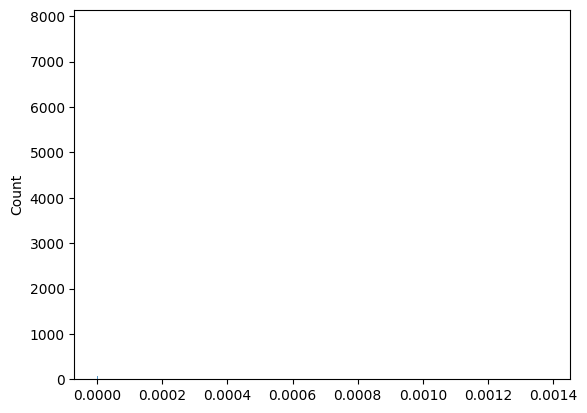

In [3]:
import numpy as np
wt = np.load('weights.npy')
import seaborn as sns
sns.histplot(wt)

In [7]:
len(wt < 0.1)

50982

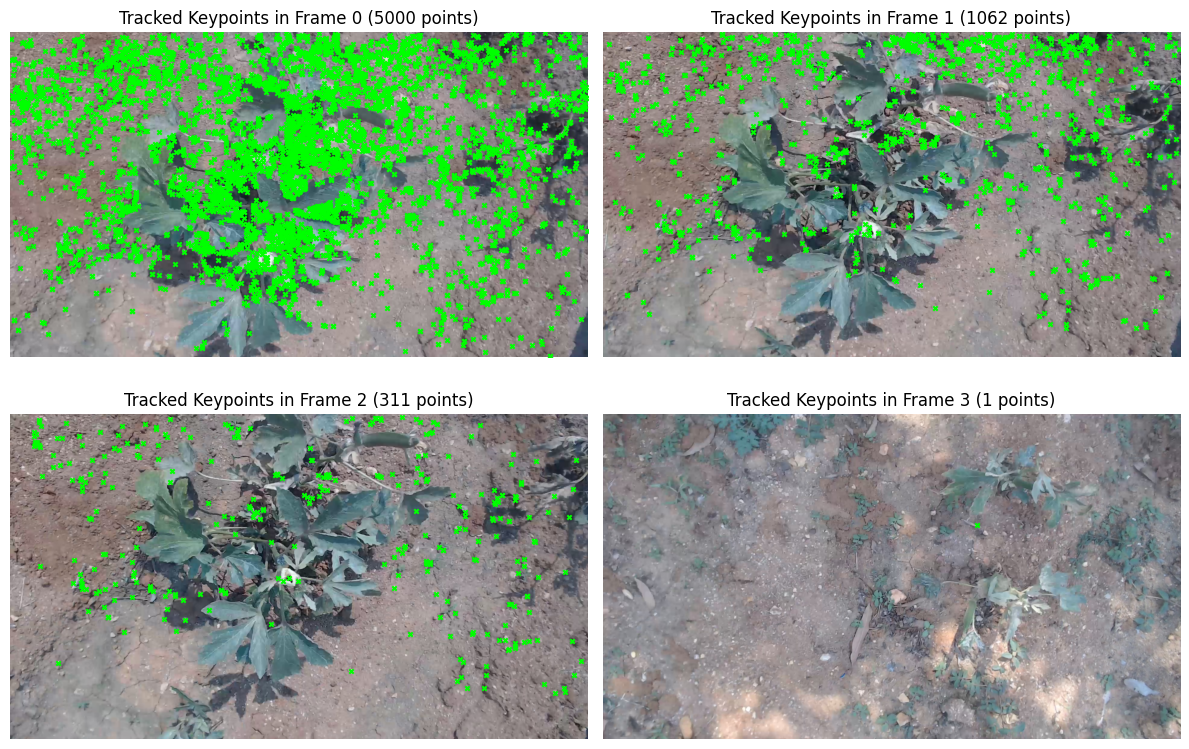

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to image directory
path = '/home/mahesh/visual_odometry/test-1/forth'

# Get first 4 .jpg images
image_files = sorted([f for f in os.listdir(path) if f.endswith('.jpg')])[10:14]
images = [cv2.imread(os.path.join(path, f)) for f in image_files]

# SIFT detector
sift = cv2.SIFT_create(5000)

# FLANN matcher parameters
index_params = dict(algorithm=1, trees=5)  # KDTree
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Detect keypoints in the first image
gray0 = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
kp0, des0 = sift.detectAndCompute(gray0, None)

# Store the coordinates of the tracked keypoints for visualization
tracked_points = [kp0]  # First frame

# Now track keypoints from image 0 through 1, 2, and 3
prev_kp = kp0
prev_des = des0

for i in range(1, 4):
    gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)

    # Match descriptors from previous frame to current
    matches = flann.knnMatch(prev_des, des, k=2)

    # Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    # Track current keypoints corresponding to original frame
    matched_kp = [kp[m.trainIdx] for m in good_matches]

    # Update for next iteration
    prev_kp = matched_kp
    prev_des = np.array([des[m.trainIdx] for m in good_matches])
    tracked_points.append(matched_kp)

# Plot tracked keypoints from frame 0 through 3
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i in range(4):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    kp_subset = tracked_points[i]  # Only first 100 tracked keypoints

    axes[i].imshow(img_rgb)

    if len(kp_subset) > 0:
        xs, ys = zip(*[kp.pt for kp in kp_subset])
        axes[i].scatter(xs, ys, c='lime', s=10, marker='x')
        axes[i].set_title(f"Tracked Keypoints in Frame {i} ({len(kp_subset)} points)")
    else:
        axes[i].set_title(f"Frame {i} - No tracked keypoints ")

    axes[i].axis('off')

plt.tight_layout()
plt.show()


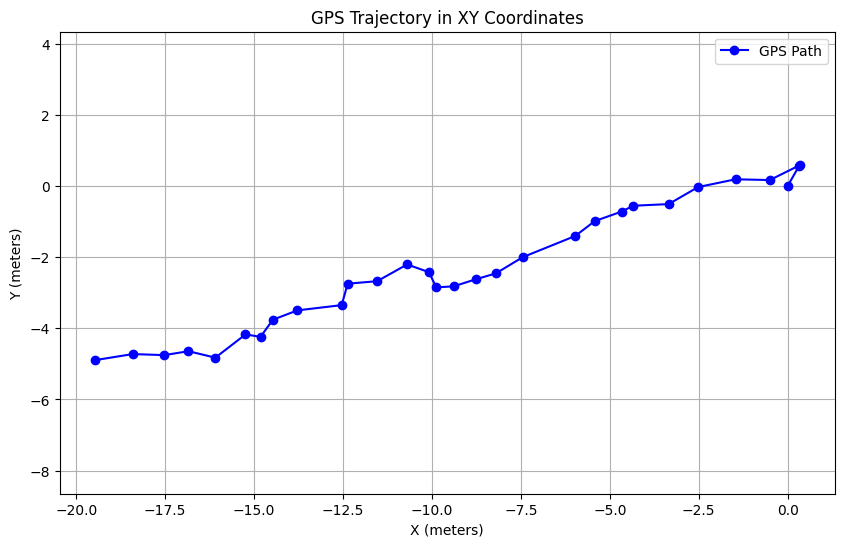

In [4]:
# /home/mahesh/vio/8-4-dataset/gps/five.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
# data = pd.read_csv("gps_data.csv")  # Replace with your actual filename

data = pd.read_csv("/home/mahesh/vio/8-4-dataset/gps/six.csv")  # Replace with your actual filename
# Extract latitude and longitude
latitudes = data.iloc[:, 1]
longitudes = data.iloc[:, 2]

# Use the first GPS point as the origin
lat0, lon0 = latitudes.iloc[0], longitudes.iloc[0]

# Convert lat/lon to meters
def latlon_to_xy(lat, lon, lat0, lon0):
    """Convert latitude and longitude to X, Y coordinates in meters."""
    R = 6371000  # Radius of Earth in meters
    x = (lon - lon0) * (np.pi / 180) * R * np.cos(lat0 * np.pi / 180)
    y = (lat - lat0) * (np.pi / 180) * R
    return x, y

# Apply conversion
x_vals, y_vals = latlon_to_xy(latitudes, longitudes, lat0, lon0)
xy_vals = np.column_stack((x_vals, y_vals))
np.save('gt_five_path', xy_vals)
# np.save('code_base/VisualOdometry/test-1/gt_path', )

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b', label="GPS Path")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title("GPS Trajectory in XY Coordinates")
plt.legend()
plt.grid()
plt.axis("equal")  # Keep the aspect ratio correct
plt.show()


In [ ]:
import cv2
import os

PATH = '/home/mahesh/vio/8-4-dataset/videos/fifth.mp4'
output_dir = f'/home/mahesh/vio/8-4-dataset/{PATH.split("/")[-1].split(".")[0]}'
os.makedirs(output_dir, exist_ok=True)
cap = cv2.VideoCapture(PATH)
frames = []


while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
    
len(frames)

745

: 

In [ ]:
for i, img in enumerate(frames):
    path = os.path.join(output_dir, f'{i}.jpg')
    cv2.imwrite(path, img)


: 

In [1]:
import cv2
import os
import numpy as np
PATH = 'holdout_training_set'
IMAGES_LIST = os.listdir(PATH)
MASKS = [f for f in IMAGES_LIST if 'mask' in f]
IMAGES = [f for f in IMAGES_LIST if 'mask' not in f]

len(IMAGES_LIST), len(IMAGES), len(MASKS)  

(8442, 4221, 4221)

In [ ]:

for img in MASKS:
    img_path = os.path.join(PATH, img)
    mask = cv2.imread(img_path)

    # Make sure mask was read correctly
    if mask is None:
        print(f"Failed to read {img_path}")
        continue

    # Count white pixels (255) in a binary mask
    white_pixels = np.sum(mask == 0)
    total_pixels = mask.shape[0] * mask.shape[1]
    var = (white_pixels / total_pixels) * 100

    if var != 0:
        print(f'{img_path} : {var:.2f}%')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [4]:
cap = cv2.VideoCapture('extras/video1.mp4')

frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()
len(frames)

935

In [5]:
frames = frames[::5]

output_dir = 'office_static_small/image_l'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for i, frame in enumerate(frames):
    cv2.imwrite(os.path.join(output_dir, f'{i}.png'), frame)